In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
file = r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\API\bigscan_FIQ.txt'

In [9]:
data = pd.read_csv(file, sep='\t')

In [10]:
f = np.array(data['F'])
i = np.array(data['I'])
q = np.array(data['Q'])
c = q+1j*i
s = np.abs(c)
p = np.unwrap(np.angle(c))

In [18]:
vals = np.polyfit(f,s,5)

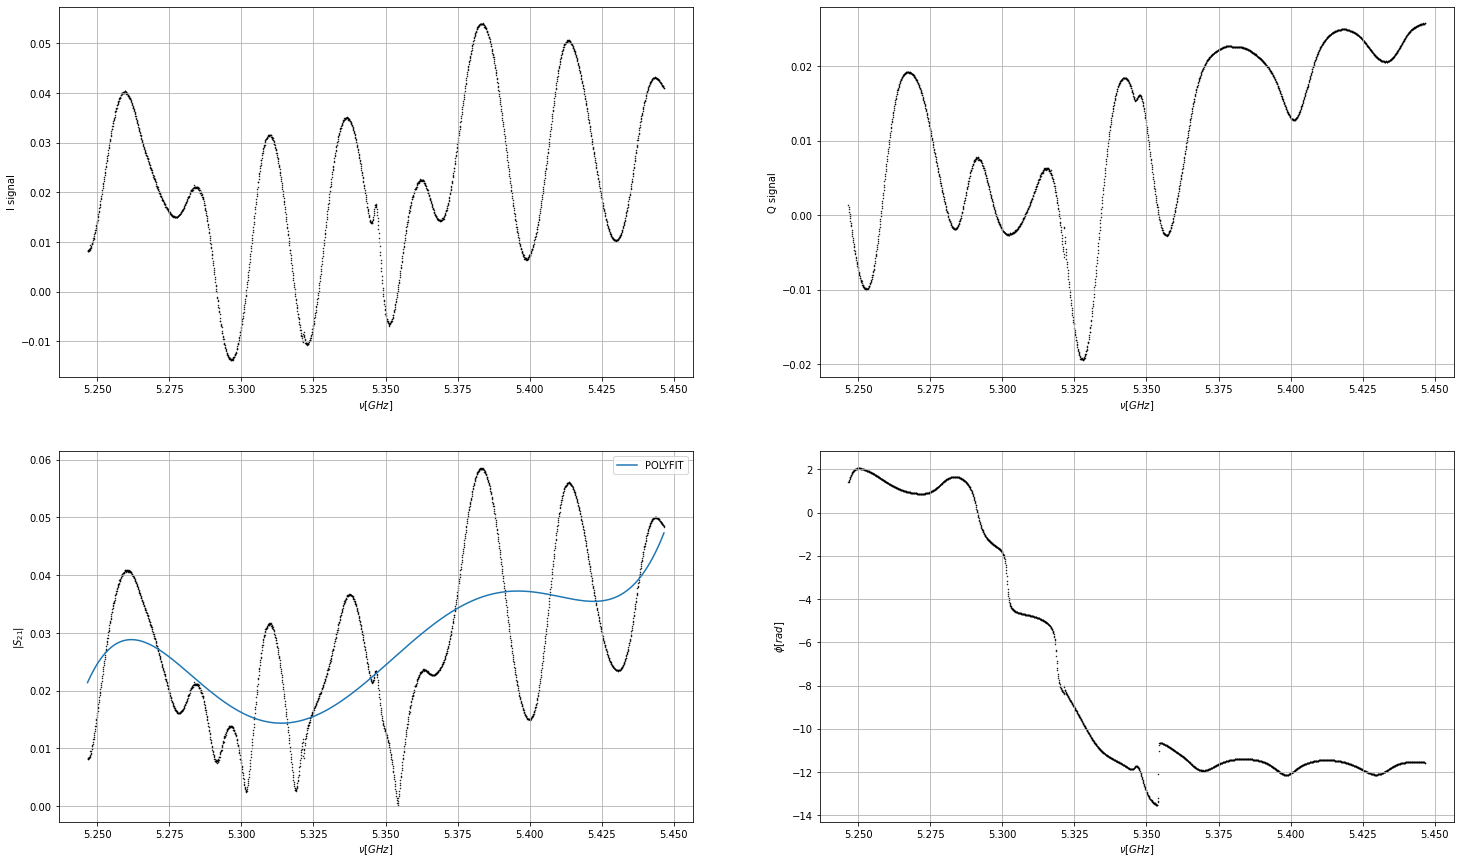

In [19]:
fig, axs = plt.subplots(2,2,figsize=(25,15))
axs[0][0].scatter(f,i,label='I signal', marker='.',color='black',s=1)
axs[0][1].scatter(f,q,label='Q signal', marker='.',color='black',s=1)
axs[0][0].set_xlabel(r'$\nu [GHz]$')
axs[0][0].set_ylabel(r'I signal')
axs[0][1].set_xlabel(r'$\nu [GHz]$')
axs[0][1].set_ylabel(r'Q signal')
axs[0][0].grid()
axs[0][1].grid()

axs[1][0].scatter(f,s, marker='.',color='black',s=1)
axs[1][0].plot(f,np.polyval(vals,f),label='POLYFIT')
axs[1][1].scatter(f,p, marker='.',color='black',s=1)
#axs[1][1].scatter(xv,yv, marker='x',color='red',s=10)
axs[1][0].set_xlabel(r'$\nu [GHz]$')
axs[1][0].set_ylabel(r'$|S_{21}|$')
axs[1][1].set_xlabel(r'$\nu [GHz]$')
axs[1][1].set_ylabel(r'$\phi [rad]$')
axs[1][0].grid()
axs[1][0].legend()
axs[1][1].grid()

Text(0.5, 0, 'Q')

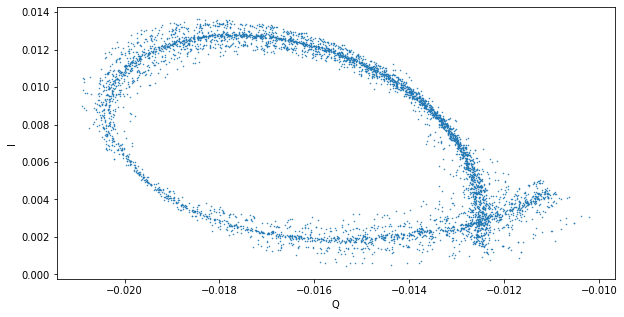

In [50]:
plt.figure(figsize=(10,5))
plt.scatter(i,q,marker='.',s=1)
plt.ylabel('I')
plt.xlabel('Q')

In [43]:
def compute_der(x,y):
    d = []
    for i in range(len(x)):
        if(i+1<len(x)):
            d.append((y[i+1]-y[i]))#/(x[i+1]-x[i]))
        else:
            pass
    return d

In [44]:
i_prime = compute_der(f,i)
q_prime = compute_der(f,q)

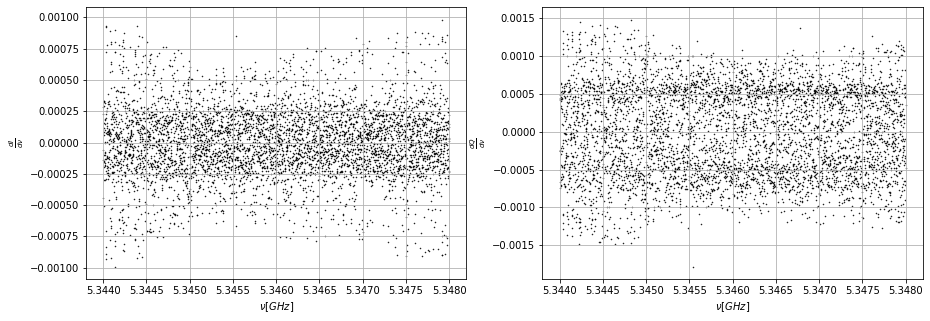

In [45]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].scatter(f[:-1],i_prime,label='I signal', marker='.',color='black',s=1)
axs[1].scatter(f[:-1],q_prime,label='Q signal', marker='.',color='black',s=1)
axs[0].set_xlabel(r'$\nu [GHz]$')
axs[0].set_ylabel(r'$\frac{dI}{d\nu}$')
axs[1].set_xlabel(r'$\nu [GHz]$')
axs[1].set_ylabel(r'$\frac{dQ}{d\nu}$')
axs[0].grid()
axs[1].grid()